In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#open corpus
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print len(messages)

5574


In [5]:
for message_no,message in enumerate(messages[:10]):
    print message_no,message
    print '\n'

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
import pandas

In [7]:
messages=pandas.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                        names=["label","message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
#new column for length of message
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

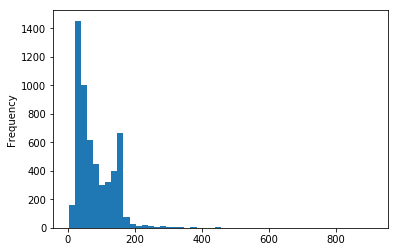

In [12]:
messages['length'].plot(bins=50,kind='hist')

In [13]:
messages.length.describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
#message length a good feature for distinguishing ham and spam?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a360ccd10>,
      dtype=object)

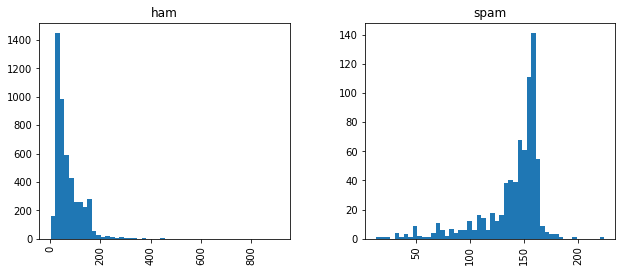

In [15]:
messages.hist(column='length',by='label',bins=50,figsize=(10,4))

In [18]:
import string
mess='Sample message! Notice: it has punctuation.'
nopunc=[char for char in mess if char not in string.punctuation]
#join char to form string after removing punc
nopunc=''.join(nopunc)

In [19]:
nopunc

'Sample message Notice it has punctuation'

In [20]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're"]

In [21]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [22]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [24]:
def text_process(mess):
    #remove punctuation
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    #remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
#tokenize original text
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [26]:
#convert token into vector that sklearn algorithm can use
#bag_of_words method

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])
len(bow_transformer.vocabulary_)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


11425

In [30]:
message4=messages['message'][3]
print message4

U dun say so early hor... U c already then say...


In [32]:
#check its vector representation
bow4=bow_transformer.transform([message4])
print bow4
print bow4.shape

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [33]:
#total 7 words for message4 after cleaning, 2 of them appear twice

In [34]:
print bow_transformer.get_feature_names()[4068]
print bow_transformer.get_feature_names()[9554]

U
say


In [35]:
#transform for entire messages
#term frequency
messages_bow=bow_transformer.transform(messages['message'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [37]:
print 'shape of sparse matrix:',messages_bow.shape
print 'amount of non-zero occurences:',messages_bow.nnz
print 'sparsity: %.2f%%'%(100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))

shape of sparse matrix: (5572, 11425)
amount of non-zero occurences: 50548
sparsity: 0.08%


In [38]:
#TF-IDF
#term frequency-inverse document frequency

In [39]:
#TF(t):nmber of times t appear in text/total number of words in text
#IDF(t):log(total number of texts/number of text with t in it)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)
tfidf4=tfidf_transformer.transform(bow4)
print tfidf4

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [42]:
#check for two specific words
print tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]
print tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

3.2800524267409408
8.527076498901426


In [43]:
#transform entire
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [44]:
print messages_tfidf.shape

(5572, 11425)


In [46]:
#train spam/ham classifier using naive bayes algorithm

In [48]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [49]:
print 'predicted:',spam_detect_model.predict(tfidf4)[0]
print 'expected:',messages.label[3]

predicted: ham
expected: ham


In [50]:
#model evaluation

In [52]:
all_predictions=spam_detect_model.predict(messages_tfidf)

In [53]:
print all_predictions

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [54]:
from sklearn.metrics import classification_report

In [55]:
from sklearn.cross_validation import train_test_split
msg_train,msg_test,label_train,label_test=\
train_test_split(messages['message'],messages['label'],test_size=0.2)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
#about 20% of the entire texts to be tested, the default split is 30/70

In [57]:
#create data pipeline(model API)
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),#count term frequency
    ('tfidf',TfidfTransformer()),#weighted TF-IDF score
    ('classifier',MultinomialNB()),#train on TF-IDF vectors with Naive Bayes classifier
])

In [58]:
pipeline.fit(msg_train,label_train)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a362f8c08>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [59]:
predictions=pipeline.predict(msg_test)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


In [60]:
print classification_report(predictions,label_test)

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98       997
       spam       0.74      1.00      0.85       118

avg / total       0.97      0.96      0.97      1115

